In [27]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load the datasets
customers = pd.read_csv(r'C:\Users\pc\Desktop\zeotap\ecommerce_analysis\data\Customers.csv')
products = pd.read_csv(r'C:\Users\pc\Desktop\zeotap\ecommerce_analysis\data\Products.csv')
transactions = pd.read_csv(r'C:\Users\pc\Desktop\zeotap\ecommerce_analysis\data\Transactions.csv')

# Check the first few rows of each dataset
print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [28]:
# Merge datasets to combine product and customer information
transactions = transactions.merge(products, on='ProductID')
data = transactions.merge(customers, on='CustomerID')

print(data.head())


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x                      ProductName     Category  Price_y  \
0      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
1      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
2      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
3      601.36   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
4      902.04   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   

      CustomerName         Region  SignupDate  
0   Andrea Jenkins         Europe  202

In [29]:
# Convert date columns to datetime format
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['SignupDate'] = pd.to_datetime(data['SignupDate'])

# Aggregate transaction data for each customer
customer_features = data.groupby('CustomerID').agg({
    'TotalValue': ['sum', 'mean', 'count'],
    'Category': lambda x: list(x),
    'Region': 'first',
    'SignupDate': 'first'
}).reset_index()

# Rename columns for clarity
customer_features.columns = [
    'CustomerID', 'Total_Spent', 'Avg_Spent', 'Total_Transactions', 
    'Purchased_Categories', 'Region', 'SignupDate'
]

# Check the aggregate customer features
print(customer_features.head())


  CustomerID  Total_Spent  Avg_Spent  Total_Transactions  \
0      C0001      3354.52    670.904                   5   
1      C0002      1862.74    465.685                   4   
2      C0003      2725.38    681.345                   4   
3      C0004      5354.88    669.360                   8   
4      C0005      2034.24    678.080                   3   

                                Purchased_Categories         Region SignupDate  
0  [Books, Home Decor, Electronics, Electronics, ...  South America 2022-07-10  
1       [Home Decor, Home Decor, Clothing, Clothing]           Asia 2022-02-13  
2    [Home Decor, Home Decor, Clothing, Electronics]  South America 2024-03-07  
3  [Books, Home Decor, Home Decor, Home Decor, Bo...  South America 2022-10-09  
4             [Home Decor, Electronics, Electronics]           Asia 2022-08-15  


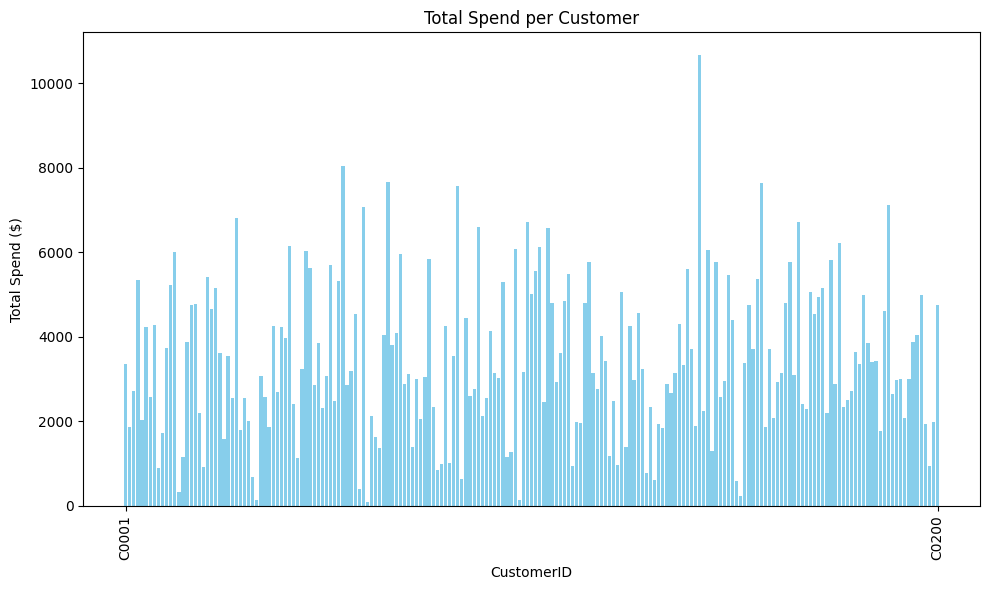

In [35]:
# Visualize Total Spend distribution with only starting and ending CustomerID
plt.figure(figsize=(10, 6))
plt.bar(customer_features['CustomerID'], customer_features['Total_Spent'], color='skyblue')
plt.title('Total Spend per Customer')
plt.xlabel('CustomerID')
plt.ylabel('Total Spend ($)')
plt.xticks([0, len(customer_features)-1], [customer_features['CustomerID'].iloc[0], customer_features['CustomerID'].iloc[-1]], rotation=90)
plt.tight_layout() 
plt.show()


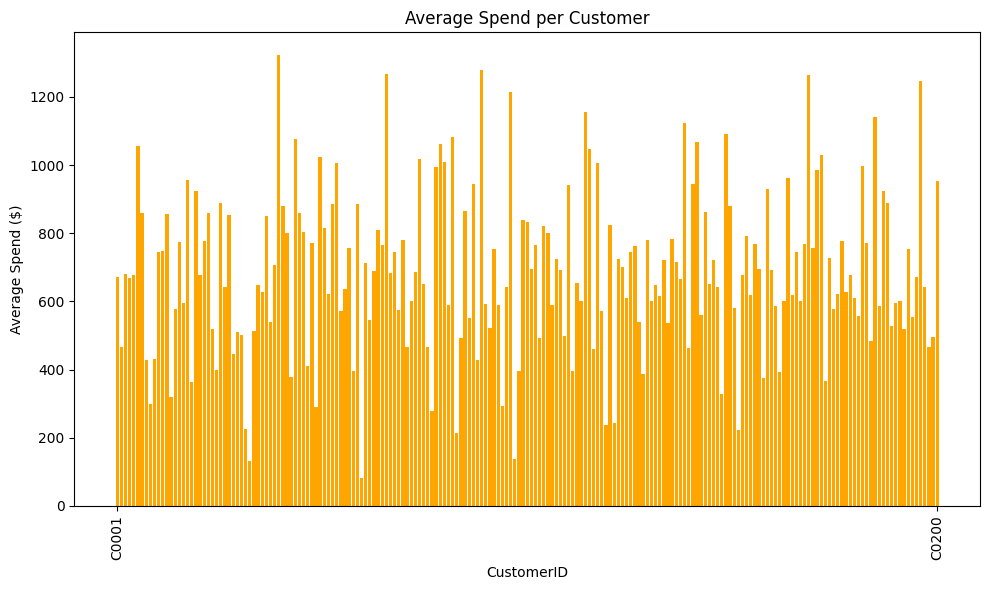

In [36]:
# Visualize Average Spend distribution with only starting and ending CustomerID
plt.figure(figsize=(10, 6))
plt.bar(customer_features['CustomerID'], customer_features['Avg_Spent'], color='orange')
plt.title('Average Spend per Customer')
plt.xlabel('CustomerID')
plt.ylabel('Average Spend ($)')

# Set custom x-tick labels (only the first and last CustomerID)
plt.xticks([0, len(customer_features)-1], [customer_features['CustomerID'].iloc[0], customer_features['CustomerID'].iloc[-1]], rotation=90)
plt.tight_layout()  # Adjust layout to avoid clipping of labels
plt.show()

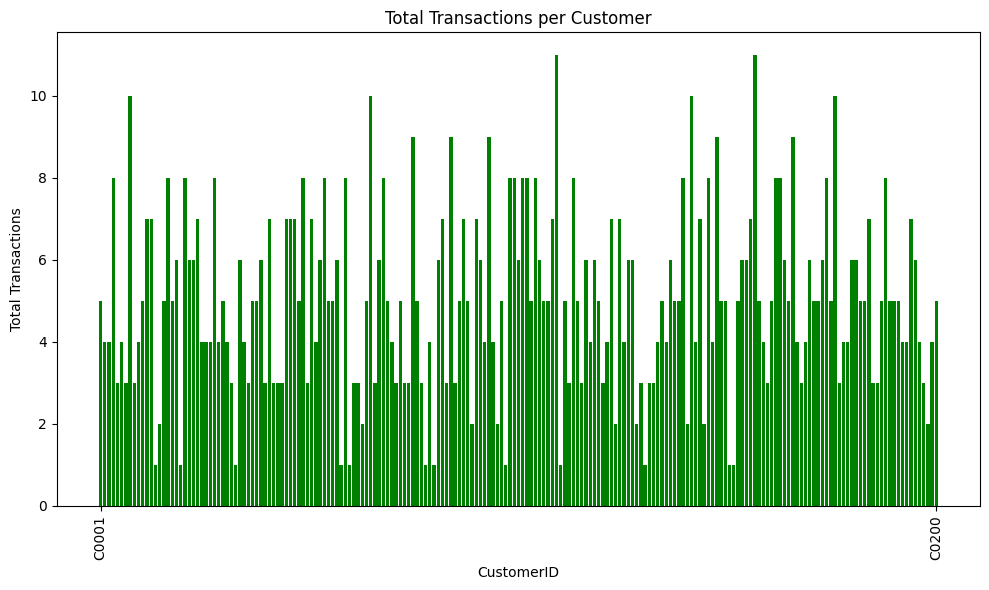

In [37]:
# Visualize Total Transactions distribution with only starting and ending CustomerID
plt.figure(figsize=(10, 6))
plt.bar(customer_features['CustomerID'], customer_features['Total_Transactions'], color='green')
plt.title('Total Transactions per Customer')
plt.xlabel('CustomerID')
plt.ylabel('Total Transactions')

# Set custom x-tick labels (only the first and last CustomerID)
plt.xticks([0, len(customer_features)-1], [customer_features['CustomerID'].iloc[0], customer_features['CustomerID'].iloc[-1]], rotation=90)
plt.tight_layout()  # Adjust layout to avoid clipping of labels
plt.show()

In [38]:
# Encode categorical features (Region)
encoder = OneHotEncoder(sparse_output=False)  # Updated argument name
region_encoded = encoder.fit_transform(customer_features[['Region']])
region_columns = [f"Region_{col}" for col in encoder.categories_[0]]
region_df = pd.DataFrame(region_encoded, columns=region_columns)

# Check the encoded region columns
print(region_df.head())


   Region_Asia  Region_Europe  Region_North America  Region_South America
0          0.0            0.0                   0.0                   1.0
1          1.0            0.0                   0.0                   0.0
2          0.0            0.0                   0.0                   1.0
3          0.0            0.0                   0.0                   1.0
4          1.0            0.0                   0.0                   0.0


In [39]:
# Scale numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[['Total_Spent', 'Avg_Spent', 'Total_Transactions']])
scaled_df = pd.DataFrame(scaled_features, columns=['Scaled_Total_Spent', 'Scaled_Avg_Spent', 'Scaled_Total_Transactions'])

# Check the scaled features
print(scaled_df.head())


   Scaled_Total_Spent  Scaled_Avg_Spent  Scaled_Total_Transactions
0           -0.061701         -0.070263                  -0.011458
1           -0.877744         -0.934933                  -0.467494
2           -0.405857         -0.026271                  -0.467494
3            1.032547         -0.076769                   1.356650
4           -0.783929         -0.040028                  -0.923530


In [40]:
# Combine all features
customer_features = pd.concat([customer_features[['CustomerID']], scaled_df, region_df], axis=1)

# Check the final feature set
print(customer_features.head())


  CustomerID  Scaled_Total_Spent  Scaled_Avg_Spent  Scaled_Total_Transactions  \
0      C0001           -0.061701         -0.070263                  -0.011458   
1      C0002           -0.877744         -0.934933                  -0.467494   
2      C0003           -0.405857         -0.026271                  -0.467494   
3      C0004            1.032547         -0.076769                   1.356650   
4      C0005           -0.783929         -0.040028                  -0.923530   

   Region_Asia  Region_Europe  Region_North America  Region_South America  
0          0.0            0.0                   0.0                   1.0  
1          1.0            0.0                   0.0                   0.0  
2          0.0            0.0                   0.0                   1.0  
3          0.0            0.0                   0.0                   1.0  
4          1.0            0.0                   0.0                   0.0  


In [41]:
# Calculate cosine similarity
customer_vectors = customer_features.drop(columns=['CustomerID']).values
similarity_matrix = cosine_similarity(customer_vectors)

# Map customer IDs to indices
customer_ids = customer_features['CustomerID'].tolist()
customer_index_map = {cid: idx for idx, cid in enumerate(customer_ids)}

# Check the similarity matrix
print(similarity_matrix[:5, :5])  


[[ 1.          0.07366992  0.87357844  0.46615255  0.03913374]
 [ 0.07366992  1.          0.30109422 -0.43883891  0.81137098]
 [ 0.87357844  0.30109422  1.         -0.02203531  0.40624621]
 [ 0.46615255 -0.43883891 -0.02203531  1.         -0.66255172]
 [ 0.03913374  0.81137098  0.40624621 -0.66255172  1.        ]]


In [42]:
# Find top 3 similar customers for each of the first 20 customers
top_3_similar = {}
for customer_id in customer_ids[:20]:
    idx = customer_index_map[customer_id]
    similarity_scores = list(enumerate(similarity_matrix[idx]))
    sorted_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:4]  # Exclude self (index 0)
    top_3_similar[customer_id] = [(customer_ids[i], round(score, 2)) for i, score in sorted_scores]

# Check the top similar customers for the first few
print(top_3_similar)


{'C0001': [('C0137', np.float64(1.0)), ('C0152', np.float64(1.0)), ('C0107', np.float64(0.96))], 'C0002': [('C0043', np.float64(0.98)), ('C0142', np.float64(0.98)), ('C0088', np.float64(0.95))], 'C0003': [('C0133', np.float64(0.99)), ('C0052', np.float64(0.98)), ('C0112', np.float64(0.94))], 'C0004': [('C0108', np.float64(0.98)), ('C0113', np.float64(0.98)), ('C0165', np.float64(0.97))], 'C0005': [('C0159', np.float64(1.0)), ('C0123', np.float64(0.98)), ('C0186', np.float64(0.97))], 'C0006': [('C0168', np.float64(0.98)), ('C0158', np.float64(0.97)), ('C0171', np.float64(0.94))], 'C0007': [('C0140', np.float64(0.98)), ('C0080', np.float64(0.95)), ('C0078', np.float64(0.95))], 'C0008': [('C0139', np.float64(0.97)), ('C0109', np.float64(0.97)), ('C0098', np.float64(0.93))], 'C0009': [('C0060', np.float64(0.98)), ('C0010', np.float64(0.98)), ('C0121', np.float64(0.98))], 'C0010': [('C0199', np.float64(0.99)), ('C0009', np.float64(0.98)), ('C0121', np.float64(0.98))], 'C0011': [('C0107', np

In [43]:
# Convert to DataFrame
lookalike_df = pd.DataFrame([
    {'cust_id': cust_id, 'lookalikes': str(lookalikes)} 
    for cust_id, lookalikes in top_3_similar.items()
])

# Save to CSV
lookalike_df.to_csv(r'C:\Users\pc\Desktop\zeotap\ecommerce_analysis\outputs\Shivam_Bhargava_Lookalike.csv', index=False)


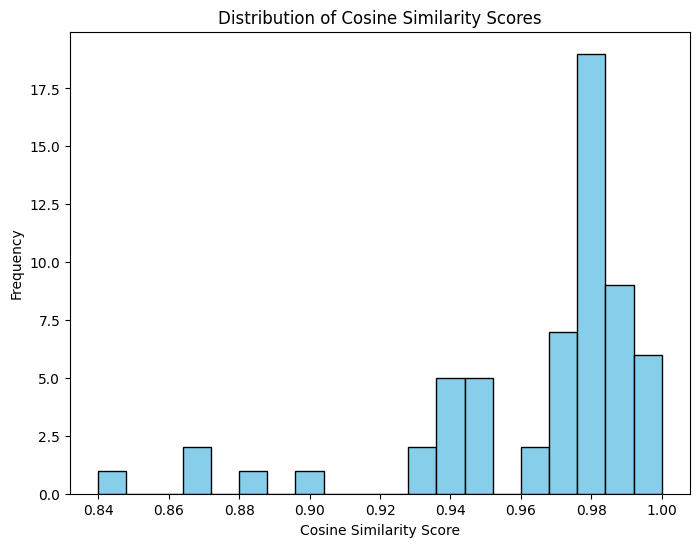

In [44]:
# Flatten similarity scores
similarity_scores = [score for lookalikes in top_3_similar.values() for _, score in lookalikes]

# Plot distribution of similarity scores
plt.figure(figsize=(8, 6))
plt.hist(similarity_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Cosine Similarity Scores')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Frequency')
plt.show()


In [ ]:
#Most of your customers are highly similar to each other, as indicated by the large frequency of cosine similarity scores near 1. 
# This suggests that, in terms of their purchasing patterns or other features we are considering (such as total spend, average spend, transaction frequency, etc.), 
# most customers share a lot of common characteristics.